In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("house_prices_numeric_cleaned.csv")

In [2]:
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,Ownership,Super Area,Dimensions,Plot Area,target_price_rupees,super_area_sqft,carpet_area_sqft,Bathroom,parking_count,parking_type
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,...,NaN,NaN,NaN,NaN,4200000.0,NaN,500.0,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,...,Freehold,NaN,NaN,NaN,9800000.0,NaN,473.0,NaN,1.0,Open
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,...,Freehold,NaN,NaN,NaN,14000000.0,NaN,779.0,NaN,1.0,Covered
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,...,NaN,NaN,NaN,NaN,2500000.0,NaN,530.0,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,...,Co-operative Society,NaN,NaN,NaN,16000000.0,NaN,635.0,NaN,1.0,Covered


In [3]:
df.shape

(187531, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Index                187531 non-null  int64  
 1   Title                187531 non-null  object 
 2   Description          184508 non-null  object 
 3   Amount(in rupees)    187531 non-null  object 
 4   Price (in rupees)    169866 non-null  float64
 5   location             187531 non-null  object 
 6   Carpet Area          106858 non-null  object 
 7   Status               186916 non-null  object 
 8   Floor                180454 non-null  object 
 9   Transaction          187448 non-null  object 
 10  Furnishing           184634 non-null  object 
 11  facing               117298 non-null  object 
 12  overlooking          106095 non-null  object 
 13  Society              77853 non-null   object 
 14  Bathroom             186668 non-null  float64
 15  Balcony          

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Index,187531.0,9.376500e+04,5.413568e+04,0.000000,4.688250e+04,9.376500e+04,1.406475e+05,1.875300e+05
Price (in rupees),169866.0,7.583772e+03,2.724171e+04,0.000000,4.297000e+03,6.034000e+03,9.450000e+03,6.700000e+06
Bathroom,186668.0,2.426640e+00,8.632440e-01,1.000000,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01
Balcony,138559.0,1.999502e+00,9.479480e-01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,8.000000e+00
Dimensions,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plot Area,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
target_price_rupees,177847.0,1.055321e+07,7.900038e+06,100000.000000,4.840000e+06,7.800000e+06,1.450000e+07,2.899000e+07
super_area_sqft,79782.0,1.379255e+03,7.559712e+02,100.000000,1.000000e+03,1.285000e+03,1.700000e+03,4.000000e+04
carpet_area_sqft,105055.0,1.249904e+03,7.055904e+02,100.000000,8.100000e+02,1.086000e+03,1.500000e+03,1.000000e+04
Bathroom,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df["target_price_rupees"].describe()


count    1.778470e+05
mean     1.198134e+07
std      3.943827e+07
min      1.000000e+05
25%      4.840000e+06
50%      7.800000e+06
75%      1.450000e+07
max      1.400300e+10
Name: target_price_rupees, dtype: float64

## Distribution of Target Price

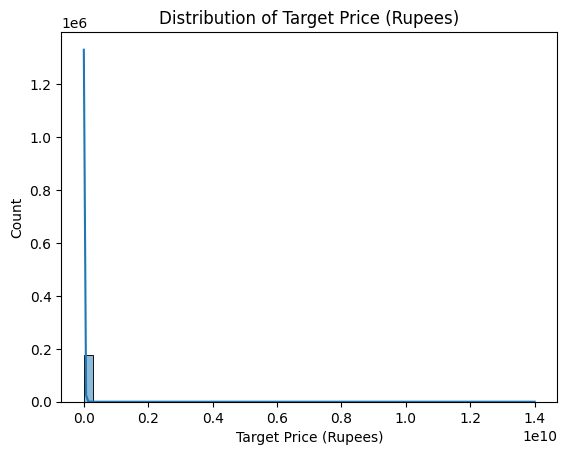

In [13]:
sns.histplot(df["target_price_rupees"], bins=50, kde=True)
plt.title("Distribution of Target Price (Rupees)")
plt.xlabel("Target Price (Rupees)")
plt.ylabel("Count")
plt.show()

### Observation:
- Target price distribution is highly right-skewed.
- Most properties are priced in the lower range.
- A few extremely expensive properties create a long right tail.
- This skewness may negatively affect model performance.

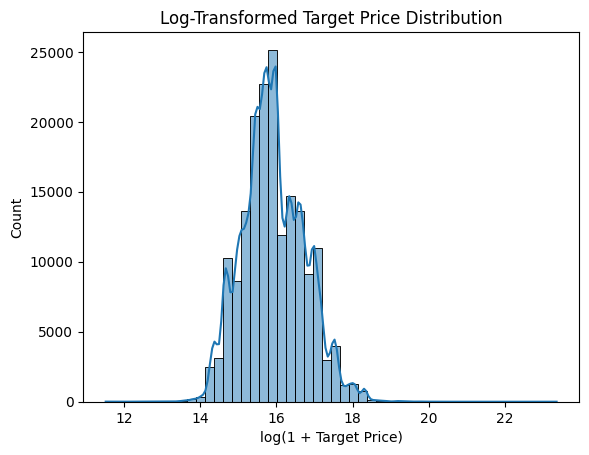

In [14]:
sns.histplot(np.log1p(df["target_price_rupees"]), bins=50, kde=True)
plt.title("Log-Transformed Target Price Distribution")
plt.xlabel("log(1 + Target Price)")
plt.ylabel("Count")
plt.show()


### Observation (After Log Transformation):
- The distribution becomes more symmetric and closer to normal.
- Extreme high-priced properties have reduced influence.
- Log transformation makes the target variable more suitable for regression models.

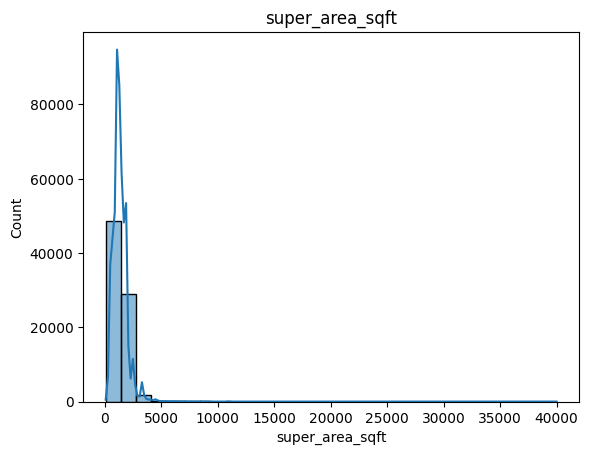

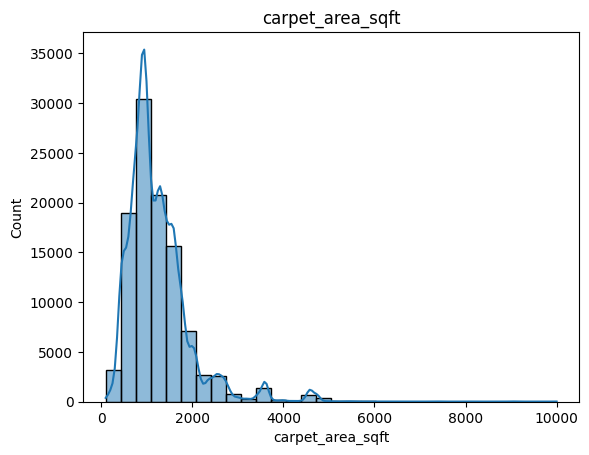

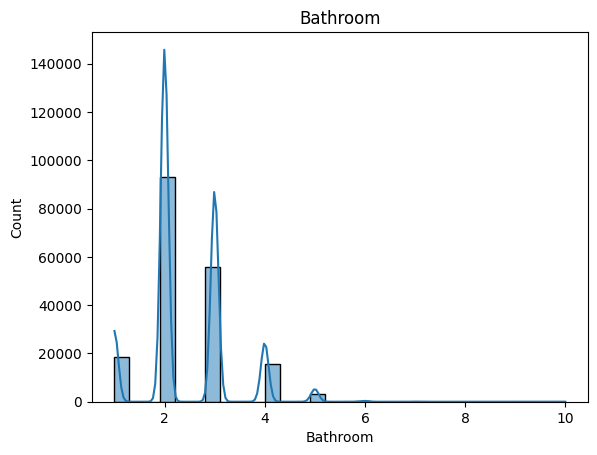

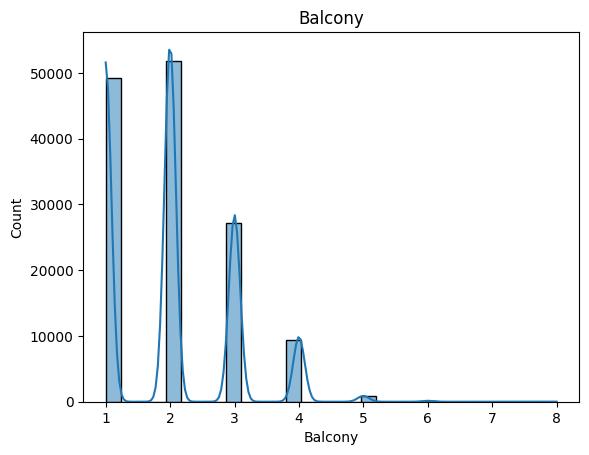

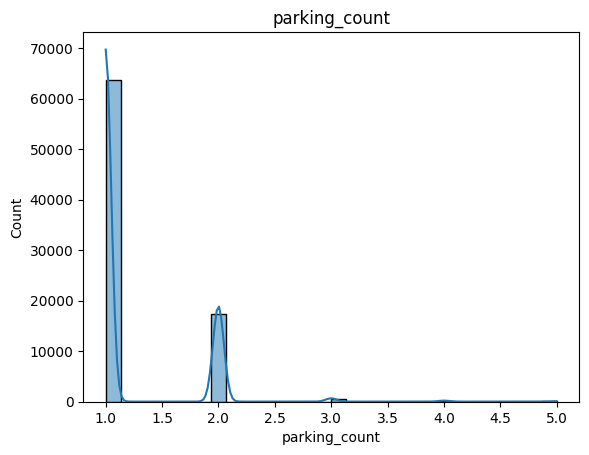

In [12]:
num_cols = [
    "super_area_sqft",
    "carpet_area_sqft",
    "Bathroom",
    "Balcony",
    "parking_count"
]

for col in num_cols:
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
    plt.show()


### Observations

**super_area_sqft**
- Highly right-skewed distribution.
- Most properties fall in the lower area range.
- Presence of extreme large-area outliers.

**carpet_area_sqft**
- Slightly right-skewed distribution.
- Majority of homes have carpet area between typical residential ranges.
- Few unusually large carpet areas indicate premium properties.

**Bathroom**
- Discrete distribution with clear peaks.
- Most houses have 2–3 bathrooms.
- Higher bathroom counts are rare.

**Balcony**
- Low variance feature.
- Majority of properties have 1 or 2 balconies.
- Higher balcony counts are uncommon.

**parking_count**
- Most properties have 0–1 parking spaces.
- Higher parking counts are rare and may indicate high-end properties.


## Target Price vs Numerical Features

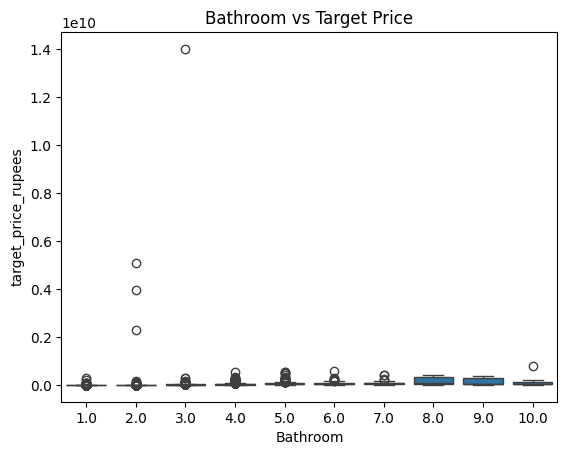

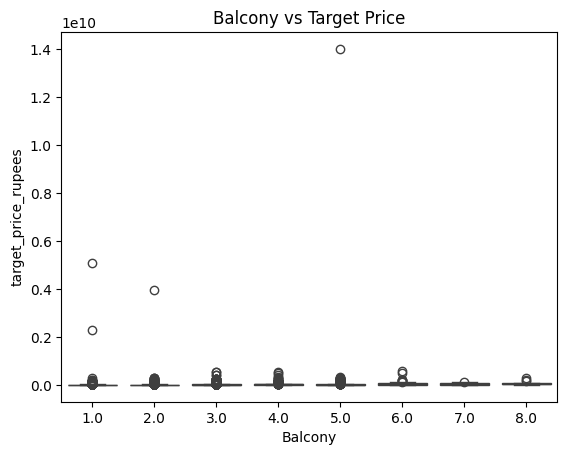

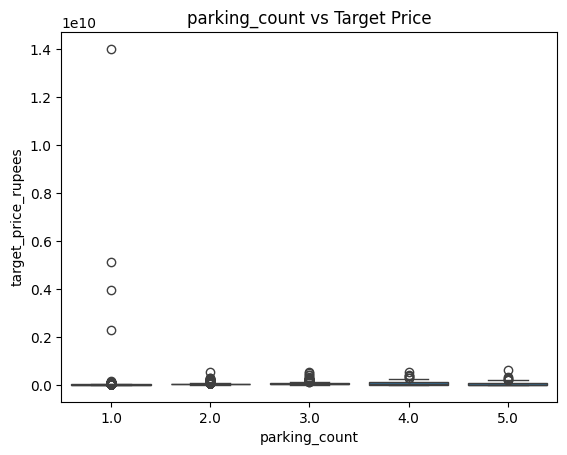

In [18]:
disc_features = [
    "Bathroom",
    "Balcony",
    "parking_count"
]

for col in disc_features:
    sns.boxplot(
        x=df[col],
        y=df["target_price_rupees"]
    )
    plt.title(f"{col} vs Target Price")
    plt.xlabel(col)
    plt.ylabel("target_price_rupees")
    plt.show()


### Observations: Discrete Numeric Features

**Bathroom**
- Median price increases with number of bathrooms.
- Higher bathrooms correlate with higher-priced properties.

**Balcony**
- Slight increase in price with more balconies.
- Relationship is weaker compared to bathrooms.

**parking_count**
- Properties with parking have noticeably higher prices.
- Multiple parking spaces indicate premium listings.

# correation

In [20]:
num_cols = [
    "target_price_rupees",
    "super_area_sqft",
    "carpet_area_sqft",
    "Bathroom",
    "Balcony",
    "parking_count"
]

corr_df = df[num_cols]


In [21]:
corr_matrix = corr_df.corr()
corr_matrix

,target_price_rupees,super_area_sqft,carpet_area_sqft,Bathroom,Balcony,parking_count
target_price_rupees,1.000000,0.649607,0.210598,0.214631,0.102096,0.149035
super_area_sqft,0.649607,1.000000,NaN,0.754873,0.383793,0.457468
carpet_area_sqft,0.210598,NaN,1.000000,0.788571,0.337665,0.512456
Bathroom,0.214631,0.754873,0.788571,1.000000,0.404374,0.513486
Balcony,0.102096,0.383793,0.337665,0.404374,1.000000,0.032107
parking_count,0.149035,0.457468,0.512456,0.513486,0.032107,1.000000


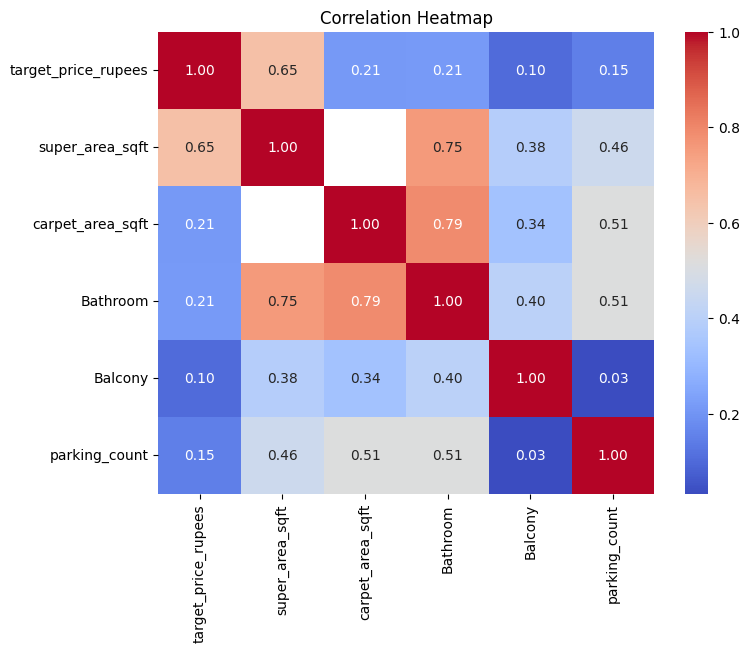

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap")
plt.show()


### Correlation Analysis
The correlation heatmap shows that **super_area_sqft** has the strongest positive relationship with property price (r = 0.65), indicating that area is a key determinant of housing prices.
Discrete features such as bathrooms, parking count, and balconies show weaker correlations with price.
Strong correlations among size-related features (super area, carpet area, bathrooms) suggest multicollinearity, which should be considered during model building.

# outlier detection

In [23]:
df['target_price_rupees'].skew()

np.float64(270.2559400379882)

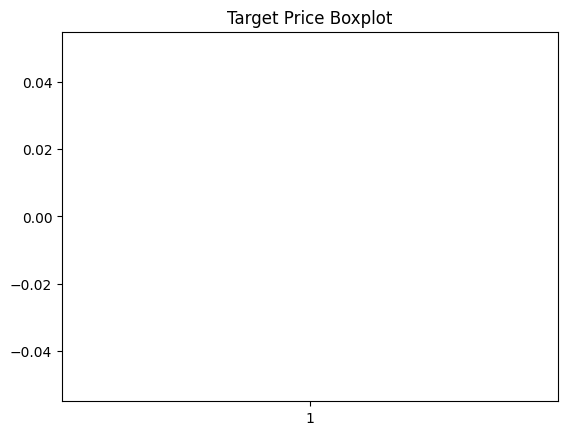

In [24]:
import matplotlib.pyplot as plt

plt.figure()
plt.boxplot(df['target_price_rupees'])
plt.title("Target Price Boxplot")
plt.show()

The boxplot appears compressed due to extreme right skewness and presence of very large outliers, which dominate the scale.

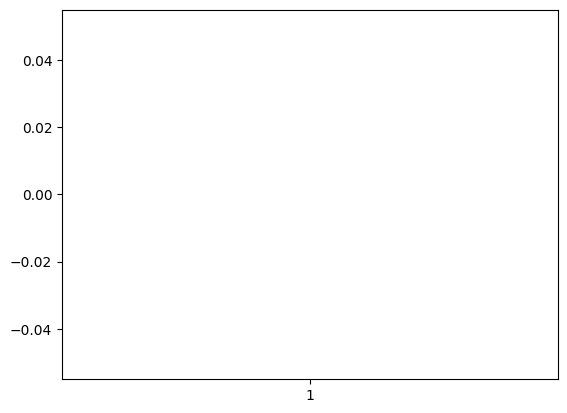

In [31]:
plt.boxplot(np.log1p(df['target_price_rupees']))
plt.show()
